In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, BorderlineSMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd 


## Load the Dataset


In [2]:
url = 'https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv'
df = pd.read_csv(url)


In [3]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

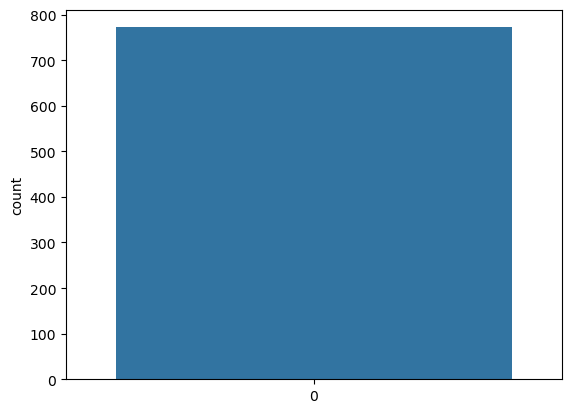

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Class'])
plt.show()

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [7]:
z = 1.96
m = 0.025  

In [8]:
n1 = int(np.ceil((z**2 * 0.1 * (1-0.1)) / (m**2)))
n2 = int(np.ceil((z**2 * 0.1 * (1-0.1)) / (m**2)))
n3 = int(np.ceil((z**2 * 0.1 * (1-0.1)) / (m**2)))
n4 = int(np.ceil((z**2 * 0.1 * (1-0.1)) / (m**2)))
n5 = int(np.ceil((z**2 * 0.1 * (1-0.1)) / (m**2)))

In [9]:
sample1 = RandomUnderSampler(sampling_strategy='majority', random_state=100)
sample2 = RandomOverSampler(sampling_strategy='minority', random_state=100)
sample3 = BorderlineSMOTE(sampling_strategy='minority', random_state=100)
sample4 = OneSidedSelection(sampling_strategy='majority')
sample5 = NeighbourhoodCleaningRule(n_neighbors=3)

In [10]:
m1 = LogisticRegression(random_state=100,max_iter=500)
m2 = KNeighborsClassifier()
m3 = RandomForestClassifier(random_state=100)
m4 = SVC(random_state=100)
m5 = ExtraTreesClassifier(random_state=100)


In [11]:
samples = {
    'S1': sample1,
    'S2': sample2,
    'S3': sample3,
    'S4': sample4,
    'S5': sample5,
}

In [12]:
models = {
    'M1': m1,
    'M2': m2,
    'M3': m3,
    'M4': m4,
    'M5': m5,
}

In [13]:
ans = {}
for sampler_name, sampler in samples.items():
    if sampler_name == 'S1':
        n = n1
    elif sampler_name == 'S2':
        n = n2
    elif sampler_name == 'S3':
        n = n3
    elif sampler_name == 'S4':
        n = n4
    else:
        n = n5

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    
    if len(X_resampled) > n:
        X_resampled = X_resampled[:n]
        y_resampled = y_resampled[:n]
    
    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        if model_name in ans:
            ans[model_name][sampler_name] = accuracy
        else:
            ans[model_name] = {sampler_name: accuracy}

C:\Users\jeetb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeetb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [14]:
print('Results:')
print('\tSampling1   Sampling2   Sampling3   Sampling4   Sampling5')
for model_name, model_results in ans.items():
    print(model_name, end='')
    for sampler_name in samples.keys():
        if sampler_name in model_results:
            print(f'    {model_results[sampler_name]:.4f}   ', end='')
        else:
            print('\t\t', end='')
    print() 

Results:
	Sampling1   Sampling2   Sampling3   Sampling4   Sampling5
M1    0.4129       0.9806       0.9806       0.9806       0.9806   
M2    0.6258       0.9806       0.9806       0.9806       0.9806   
M3    0.6065       0.9806       0.9806       0.9806       0.9806   
M4    0.6387       0.9806       0.9806       0.9806       0.9806   
M5    0.7226       0.9806       0.9806       0.9806       0.9806   
